# Biodata
Nama: Randa Andriana Putra\
NIM: 122450083\
Kelas: RB

# Data yang digunakan:
https://www.kaggle.com/datasets/roopacalistus/superstore/

Data tersebut berisi data penjualan toko supermarket di berbagai wilayah amerika serikat.

Kolom-kolomnya yaitu:
Ship Mode,
Segment,
Country,
City,
State,
Postal code,
Region,
Category,
Sub-category,
Sales,
Quantity,
Discount,
dan Profit

# Tujuan visualisasi:

Beberapa tujuan dari visualisasi yang akan dilakukan adalah:
1. **Conduct Analysis**, yaitu untuk menganalisis kinerja penjualan atau keuntungan dari berbagai produk kategori dan melakukan evaluasi.
2. **Assist Decision**, yaitu untuk membantu pemilihan keputusan perusahaan pemilik toko supermarket tersebut dalam menentukan besar kecilnya diskon.
3. **To lookup**, yaitu untuk melihat atau mengidentifikasi kategori produk, segmen pelanggan, dan lokasi yang paling menguntungkan.

# User atau target visualisasi ditujukan:

Visualisasi ini ditujukan dalam lingkup kerja yang sama (boardroom environtment) yang orang-orangnya paham tentang sebuah bisnis serta marketing. Serta ditujukan untuk laporan kepada bos atau audit perusahaan untuk menunjukkan kinerja toko (one-to-one exchange with a manager).

# Fungsi dalam visualisasi ini:

1. Menampilkan visualisasi diagram batang untuk menunjukkan persebaran penjualan setiap kategori produknya.
2. Menampilkan visualisasi yang menunjukkan hubungan antara diskon dengan keuntungan. (scatterplot)

# Tone dalam visualisasi ini:

Berorientasi bisnis sehingga data yang disajikan harus jelas dan mudah dipahami terutama oleh stakeholder (orang awam / tidak paham teknis, yang bekerja sama dengan kita) serta harus presisi, akurat dan detail dalam menampilkan angka-angka pentingnya.

# Visualisasi:

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


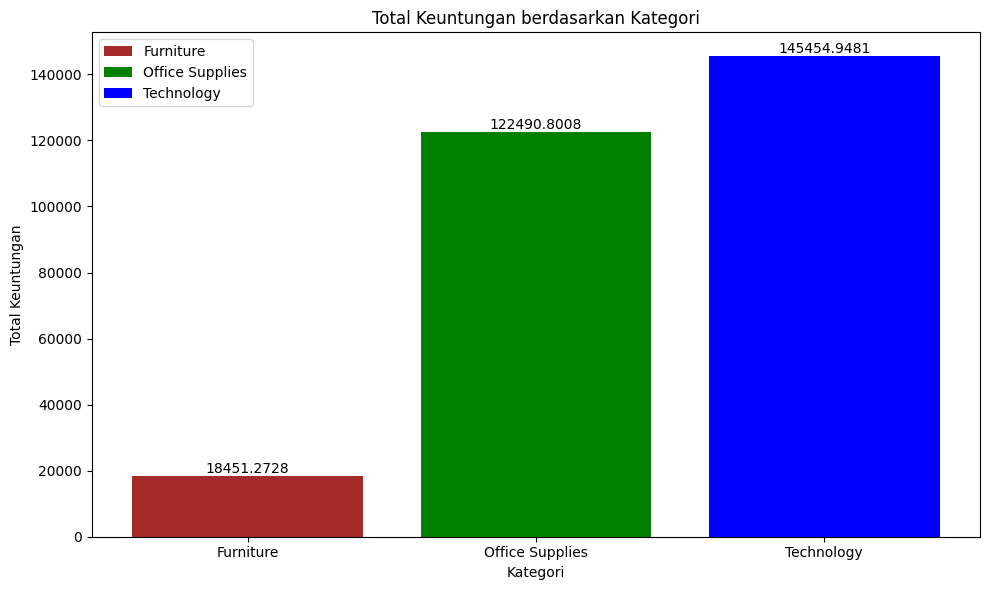

In [33]:
category_profit = df.groupby('Category')['Profit'].sum()
colors = {'Furniture': 'brown', 'Office Supplies': 'green', 'Technology': 'blue'}

plt.figure(figsize=(10, 6))
for category in category_profit.index:
  plt.bar(category, category_profit[category], color=colors[category], label=category)
  plt.text(category, category_profit[category], str(category_profit[category]), ha='center', va='bottom')
plt.xlabel('Kategori')
plt.ylabel('Total Keuntungan')
plt.title('Total Keuntungan berdasarkan Kategori')
plt.tight_layout()
plt.legend()
plt.show()

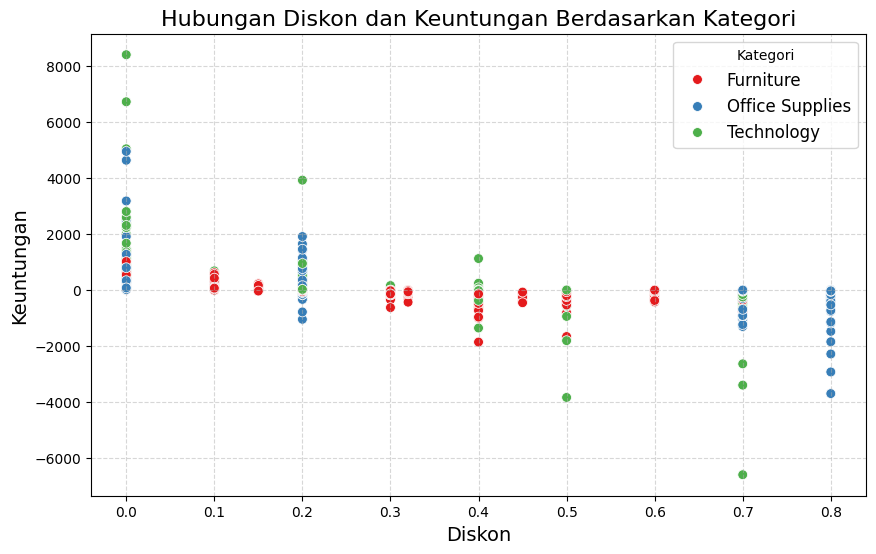

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', palette='Set1', s=50)
plt.title('Hubungan Diskon dan Keuntungan Berdasarkan Kategori', fontsize=16)
plt.xlabel('Diskon', fontsize=14)
plt.ylabel('Keuntungan', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Kategori', fontsize=12)
plt.show()

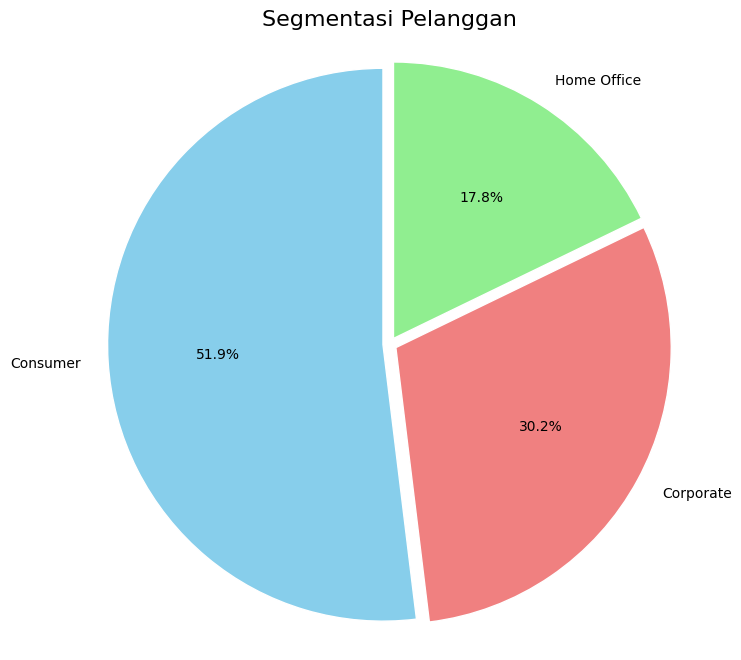

In [35]:
segment_counts = df['Segment'].value_counts()
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'lightcoral', 'lightgreen']
explode = (0.025, 0.025, 0.025)

plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Segmentasi Pelanggan', fontsize=16)
plt.axis('equal')
plt.show()

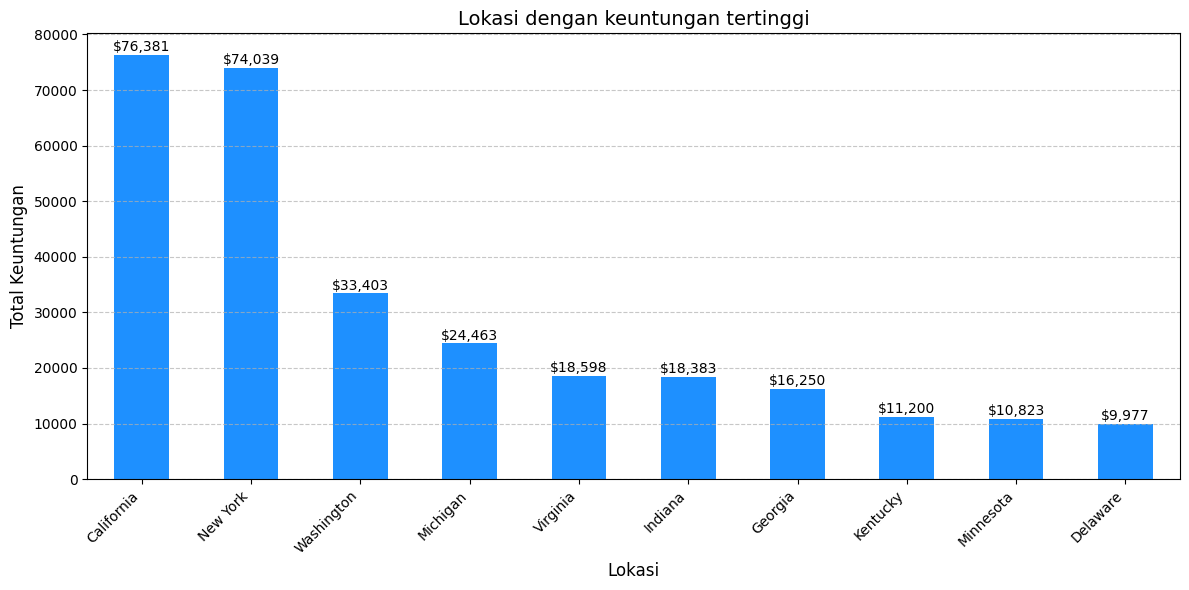

In [36]:
plt.figure(figsize=(12, 6))
bars = state_profit[:10].plot(kind='bar', color='dodgerblue')

for i, profit in enumerate(state_profit[:10]):
    bars.text(i, profit + 100, f'${profit:,.0f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Lokasi', fontsize=12)
plt.ylabel('Total Keuntungan', fontsize=12)
plt.title('Lokasi dengan keuntungan tertinggi', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()